In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from scipy import stats
from IPython.core.interactiveshell import InteractiveShell

In [2]:
# Libraries Settings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=Warning)
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
np.set_printoptions(suppress=True)

def set_seed(seed=42):
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    
pd.set_option("display.width", 100)
pd.set_option("display.max_columns", 60)
pd.set_option("display.max_rows", 25)
pd.set_option("display.float_format", lambda x: "%.3f" % x)

In [3]:
df_deals = pd.read_excel ('data/Deals (investment).xlsx')
df_deals.head()

,1_post_date,2_post_title,3_amount,4_Stake,5_funding_round,6_investors,7_source,Country/Town,Country(HQ),Category,main_sector,Check vs Companies,"Deals Information, Level of Completeness",duplicated_conc,Duplication,Disclosed,Founded,Total Disclosed Funding,DA Classification_African Company (Yes = 0; No = 1),"funding round, DA","Industry, DA",Year,Month,Quarter,Half,Number of Investors,Investor 1,Investor 2,Investor 3,Investor 4,Investor 5,Investor 6,Investor 7,Investor 8,Investor 9,Investor 10,Investor 11,Investor 12,Investor 13,Investor 14,Investor 15,Cummulative Deals (Disclosed),Cummulative Deals (Undisclosed),Cummulative Amount,Investor 1.1,Investor 2.1,Investor 3.1,Investor 4.1,Investor 5.1,Investor 6.1,Investor 7.1,Investor 8.1,Investor 9.1,Investor 10.1,Investor 11.1,Investor 12.1,Investor 13.1,Investor 14.1,Investor 15.1
0,2008-09-01,biNu,600000,NaN,Seed,Artesian VC,https://www.crunchbase.com/search/funding_roun...,NaN,NaN,NaN,NaN,NaN,0.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000,9.000,3.000,2.000,1.000,#REF!,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,NaN,NaN,NaN,#REF!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008-11-01,biNu,400000,NaN,Angel,Undisclosed,https://www.crunchbase.com/search/funding_roun...,Australia,Australia,Mobile Internet,Information Technology,biNu,0.900,NaN,NaN,1.000,2008.000,14220000.000,1.000,2. Seed,Other Technologies & Information Technology,2008.000,11.000,4.000,2.000,1.000,#REF!,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,NaN,NaN,NaN,#REF!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-12-03,AllLife,6000000,NaN,Private Equity,LeapFrog Investments,http://www.prnewswire.co.uk/news-releases/leap...,South Africa,South Africa,"Insurance, InsurTech",Financial Services,AllLife,0.900,NaN,NaN,1.000,2004.000,12700000.000,0.000,6. Private Equity,Financial Services,2009.000,12.000,4.000,2.000,1.000,#REF!,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,NaN,NaN,NaN,#REF!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-12-11,Bridge International Academies,1800000,NaN,Grant,Omidyar Network,http://foundationcenter.org/pnd/news/story.jht...,NaN,NaN,NaN,NaN,NaN,0.643,NaN,NaN,1.000,NaN,27800000.000,NaN,1. Grant,NaN,2009.000,12.000,4.000,2.000,1.000,Omidyar Network,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,NaN,NaN,NaN,Omidyar Network,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-04-01,biNu,320000,NaN,Angel,Undisclosed,https://www.crunchbase.com/search/funding_roun...,NaN,NaN,NaN,NaN,NaN,0.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.000,4.000,2.000,1.000,1.000,#REF!,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,NaN,NaN,NaN,#REF!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_deals['3_amount'].fillna(0, inplace=True)
# df_deals['3_amount'].astype

In [5]:
df_deals['3_amount']

0        600000
1        400000
2       6000000
3       1800000
4        320000
         ...   
2054          0
2055          0
2056          0
2057          0
2058          0
Name: 3_amount, Length: 2059, dtype: object

In [6]:
temp = df_deals[['2_post_title', '6_investors', '3_amount']]

In [7]:
print(temp.dtypes)

2_post_title    object
6_investors     object
3_amount        object
dtype: object


In [8]:
check_Existence = temp.loc[temp['3_amount'] == "Undisclosed"]
check_Existence

,2_post_title,6_investors,3_amount
9,M-KOPA,Undisclosed,Undisclosed
16,Bridge International Academies,"Khosla Impact, Khosla Ventures, Learn Capital,...",Undisclosed
17,elmenus,Undisclosed,Undisclosed
23,Zando,J.P. Morgan Asset Management,Undisclosed
24,Bkam,Osman Ahmed Osman,Undisclosed
...,...,...,...
1236,FundingHub,Fincheck,Undisclosed
1238,Naasakle,Palladium Group,Undisclosed
1254,Doctoorum,Numu Capital,Undisclosed
1262,Snapnsave,Vunani Capital,Undisclosed


In [9]:
# drop all rows with 'Undisclosed' in the 'AmountInUSD' column
temp = temp.dropna(subset=['3_amount'])

In [10]:
temp = temp[temp['3_amount'] != 'Undisclosed']

df_deals['3_amount'] = df_deals['3_amount'].replace('Undisclosed', '0')

clean_df = df_deals.copy()

In [11]:
# check_Existence = temp.loc[temp['3_amount'] == "Undisclosed"]
# check_Existence

In [12]:
temp['3_amount'] = temp['3_amount'].astype(int)

In [13]:
print(temp.dtypes)

2_post_title    object
6_investors     object
3_amount         int64
dtype: object


In [14]:
# group by StartupName and calculate the sum of AmountInUSD
temp = temp.groupby('2_post_title').agg(sum=('3_amount', 'sum')).reset_index()


In [15]:
temp

,2_post_title,sum
0,10X Investments,6000000
1,54gene,4650000
2,7aweshly,28000
3,AJUA,3500000
4,ARED,250000
...,...,...
649,iono.fm,454600
650,mPharma,25100000
651,ogaVenue,45000
652,okGo.live,65000


### Startups with investors confidence 

In [16]:
temp = temp.sort_values('sum', ascending=False).reset_index()

temp

,index,2_post_title,sum
0,161,Eskom,1086610000
1,263,Jumia Group,885400000
2,25,Airtel Africa,200000000
3,35,Andela,181000000
4,517,Takealot,169000000
...,...,...,...
649,92,Cash4Trash,1000
650,96,Charge Ko Technologies,1000
651,481,Shield Finders,1000
652,435,Provider,1000


In [17]:
temp.to_csv("invConf.csv", index=True)

### Giant Investors

In [18]:
clean_df['3_amount'].isna().sum()
clean_df.dtypes

0

1_post_date        datetime64[ns]
2_post_title               object
3_amount                   object
4_Stake                   float64
5_funding_round            object
                        ...      
Investor 11.1              object
Investor 12.1              object
Investor 13.1              object
Investor 14.1              object
Investor 15.1             float64
Length: 59, dtype: object

In [19]:
clean_df['3_amount'] = clean_df['3_amount'].astype(int)

In [20]:

giant_agg = clean_df.groupby(['6_investors']).agg(count=('6_investors', 'count'), TotalInvestment=('3_amount', 'sum')).reset_index()

In [45]:

giant_agg = giant_agg.sort_values('TotalInvestment', ascending=False).reset_index()

giant_agg 

,index,6_investors,count,TotalInvestment
0,652,Undisclosed,186,1332592337
1,513,"Rocket Internet, MTN Group, Orange, Goldman Sa...",1,400000000
2,498,Qatar Investment Authority,1,200000000
3,421,"Millicom Systems, Rocket Internet, MTN Group",1,150000000
4,588,"Summit Partners, Rocket Internet, Orange, Mill...",1,150000000
...,...,...,...,...
712,68,Alphawave group,1,0
713,1,Blue Garnet Ventures,1,0
714,360,"Khosla Impact, Khosla Ventures, Learn Capital,...",1,0
715,714,nChain,1,0


In [22]:
# Sort temp dataframe by descending TotalInvestment and drop rows with missing TotalInvestment
giant_agg = giant_agg.sort_values(by='TotalInvestment', ascending=False).dropna(subset=['TotalInvestment'])


<Figure size 864x432 with 0 Axes>

<AxesSubplot:xlabel='6_investors', ylabel='TotalInvestment'>

Text(0.5, 1.0, 'Giant Investors !!!')

Text(0.5, 0, '')

Text(0, 0.5, 'Total Investment')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Undisclosed'),
  Text(1, 0, 'Rocket Internet, MTN Group, Orange, Goldman Sachs, CDC Group, AXA Group'),
  Text(2, 0, 'Qatar Investment Authority'),
  Text(3, 0, 'Millicom Systems, Rocket Internet, MTN Group'),
  Text(4, 0, 'Summit Partners, Rocket Internet, Orange, Millicom Systems, MTN Group, Goldman Sachs, CDC Group, AXA Group'),
  Text(5, 0, 'Tiger Global Management'),
  Text(6, 0, 'Generation Investment Management, Chan Zuckerberg Initiative, GV, Spark Capital, CRE Venture Capital'),
  Text(7, 0, 'Pernod Ricard'),
  Text(8, 0, 'Naspers'),
  Text(9, 0, 'Mastercard')])

NameError: name 'mpl' is not defined

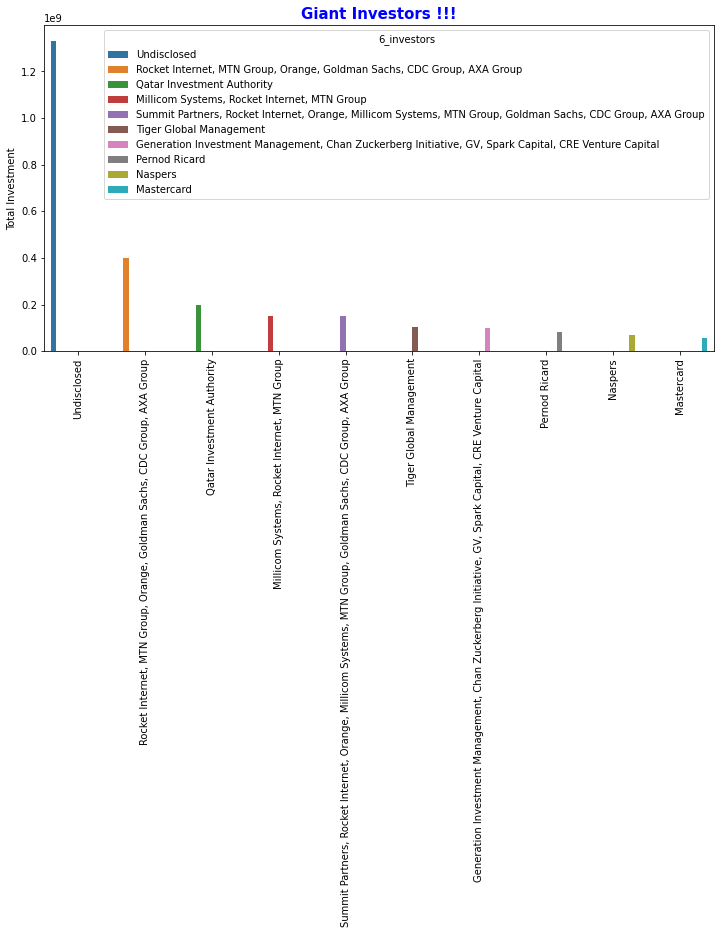

In [23]:
# Plot top 10 investors using seaborn barplot
plt.figure(figsize=(12, 6))
sns.barplot(data=giant_agg.head(10), x='6_investors', y='TotalInvestment', hue='6_investors')
plt.title('Giant Investors !!!', fontsize=15, fontweight='bold', color='blue')
plt.xlabel('')
plt.ylabel('Total Investment')
plt.xticks(rotation=90)
plt.gca().yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.legend().remove()
plt.show()

### Unique investors

In [37]:
unq_inv = clean_df.dropna(subset=['6_investors'])[['Quarter', '6_investors']]

In [39]:
unq_inv = clean_df[['Quarter', '6_investors']].groupby('Quarter').agg({'6_investors': pd.Series.nunique}).reset_index()
# clean_df1.columns = ['Quarter', 'count']

In [40]:
unq_inv

,Quarter,6_investors
0,1.000,202
1,2.000,214
2,3.000,209
3,4.000,184


In [44]:
# # Line plot with ggplot2
# p = sns.lineplot(x=clean_df['Quarter'], y=clean_df.value_counts(), data=temp, color='red', linewidth=1)

# # Formatting x-axis labels
# p.xaxis.set_major_formatter(mdates.DateFormatter('%Y-Q%q'))
# plt.xticks(rotation=90)

# # Removing legend and setting title
# p.legend().remove()
# p.set(title='Trend of Unique Investors', xlabel='', ylabel='')

# # Plotting
# plt.show()

### Analysing Top Investors

##### Undisclosed investment analysis

In [49]:

ana_top_inv = clean_df.loc[(clean_df["6_investors"]=="Undisclosed") | (clean_df["6_investors"]=="Undisclosed"), ["Quarter", "2_post_title", "3_amount"]]
ana_top_inv = ana_top_inv.groupby(["Quarter", "2_post_title"]).agg({"3_amount": "sum"}).reset_index().rename(columns={"3_amount": "TotalInvestment"})
ana_top_inv

,Quarter,2_post_title,TotalInvestment
0,1.000,Africa Courier Express,715000
1,1.000,AfricaSokoni,445000
2,1.000,Bumba,0
3,1.000,Buycoins,1100000
4,1.000,Cortex Logic,0
...,...,...,...
169,4.000,Zaytech,0
170,4.000,Zooba Eats,4000000
171,4.000,biNu,400000
172,4.000,iCog Labs,100000


AttributeError: Use the `.axes` attribute when facet variables are assigned.

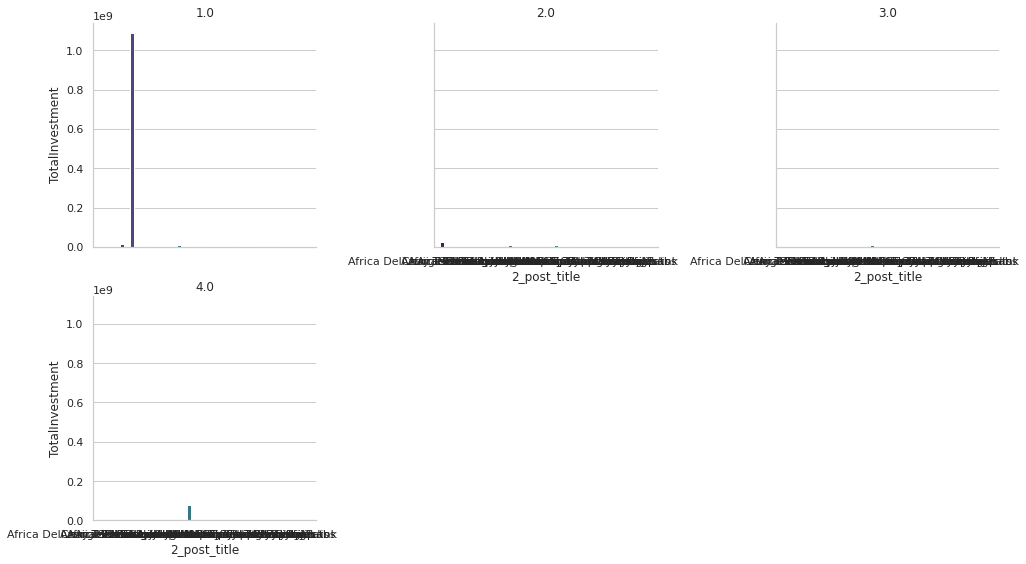

In [51]:
sns.set_theme(style="whitegrid")
g = sns.FacetGrid(ana_top_inv, col="Quarter", col_wrap=3, height=4, aspect=1.2)
g.map(sns.barplot, "2_post_title", "TotalInvestment", palette="viridis")
g.set_titles("{col_name}")
g.set(xlabel="", ylabel="Total Investment", ylim=(0, ana_top_inv["TotalInvestment"].max()*1.1), yticklabels=[f"{x:,.0f}" for x in g.ax.get_yticks()])
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Undiclosed Investments over the 3 years", fontsize=14, fontstyle="italic")
sns.despine(left=True)
plt.show()

##### Qatar Investment Authority analysis

In [50]:
ana_top_inv_QIA = clean_df.loc[(clean_df["6_investors"]=="Qatar Investment Authority") | (clean_df["6_investors"]=="Qatar Investment Authority"), ["Quarter", "2_post_title", "3_amount"]]
ana_top_inv_QIA = ana_top_inv_QIA.groupby(["Quarter", "2_post_title"]).agg({"3_amount": "sum"}).reset_index().rename(columns={"3_amount": "TotalInvestment"})
ana_top_inv_QIA

,Quarter,2_post_title,TotalInvestment
0,1.000,Airtel Africa,200000000


AttributeError: Use the `.axes` attribute when facet variables are assigned.

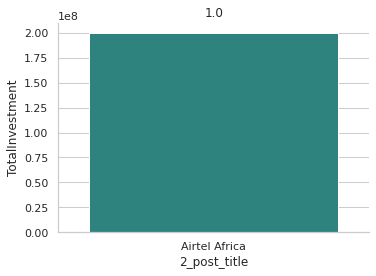

In [52]:
sns.set_theme(style="whitegrid")
g = sns.FacetGrid(ana_top_inv_QIA, col="Quarter", col_wrap=3, height=4, aspect=1.2)
g.map(sns.barplot, "2_post_title", "TotalInvestment", palette="viridis")
g.set_titles("{col_name}")
g.set(xlabel="", ylabel="Total Investment", ylim=(0, ana_top_inv_QIA["TotalInvestment"].max()*1.1), yticklabels=[f"{x:,.0f}" for x in g.ax.get_yticks()])
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Qatar Investment Authority Investments over the 3 years", fontsize=14, fontstyle="italic")
sns.despine(left=True)
plt.show()